In [15]:
import pandas as pd

url = "https://api.mfapi.in/mf"
df = pd.read_json(url)

In [16]:
df.head()

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
0,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,None,None
1,100028,Grindlays Super Saver Income Fund-GSSIF-Quater...,None,None
2,100029,Grindlays Super Saver Income Fund-GSSIF-Growth,None,None
3,100030,Grindlays Super Saver Income Fund-GSSIF-Annual...,None,None
4,100031,Grindlays Super Saver Income Fund-GSSIF - ST-D...,None,None


In [17]:
hdfc = df[df['schemeName'].str.contains('^HDFC')] # fetches funds by HDFC AMC
hdfc.head()

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
52,100119,HDFC Balanced Advantage Fund - Growth Plan,INF179K01830,None
53,100120,HDFC Balanced Advantage Fund - IDCW Plan,INF179K01814,INF179K01822
54,100121,HDFC Balanced Fund - Dividend Option,None,None
55,100122,HDFC Balanced Fund - Growth Option,None,None
56,100123,HDFC Income Fund - Quarterly IDCW Option,INF179K01947,INF179K01954


In [18]:
#Total funds in HDFC AMC
len(hdfc)

3291

In [19]:
hdfc_index = hdfc[hdfc['schemeName'].str.contains('Index Fund')]
hdfc_index.head()

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
578,101281,HDFC BSE Sensex Index Fund - Growth Plan,INF179K01LA9,None
579,101282,HDFC Index Fund-Sensex Plus( FV-Rs32.161),None,None
663,101525,HDFC Nifty 50 Index Fund - Growth Plan,INF179K01KZ8,None
14037,119063,HDFC Nifty 50 Index Fund - Direct Plan,INF179K01WM1,None
14038,119064,HDFC Index Fund Sensex Plus Plan-Direct Plan,None,None


In [20]:
# Number of index funds in HDFC AMC
len(hdfc_index)

53

In [21]:
schemeCode = 119065
hdfc[hdfc['schemeCode']==schemeCode]

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
14039,119065,HDFC BSE Sensex Index Fund - Direct Plan,INF179K01WN9,None


In [116]:
# data about a fund
import json
from urllib.request import urlopen

response = urlopen(url+'/'+str(schemeCode))
if response.getcode()==200:
    print("Success!")
    data = json.loads(response.read().decode('utf-8'))
fund_df = pd.DataFrame(data['data'])
fund_df = fund_df.iloc[::-1] # reverse the dataframe

Success!


In [118]:
fund_name = data['meta']['scheme_name']

In [121]:
# change datatype to float
fund_df['nav'] = fund_df['nav'].astype('float')
# change datatype to datetime
fund_df['date'] = pd.to_datetime(fund_df['date'], format='%d-%m-%Y')
# set date as index
fund_df = fund_df.set_index('date')

In [122]:
fund_df

,nav
date,
2013-01-01,163.6338
2013-01-02,164.7386
2013-01-03,165.1558
2013-01-04,165.3131
2013-01-07,164.5376
...,...
2025-10-06,776.8890
2025-10-07,778.1818
2025-10-08,776.7234


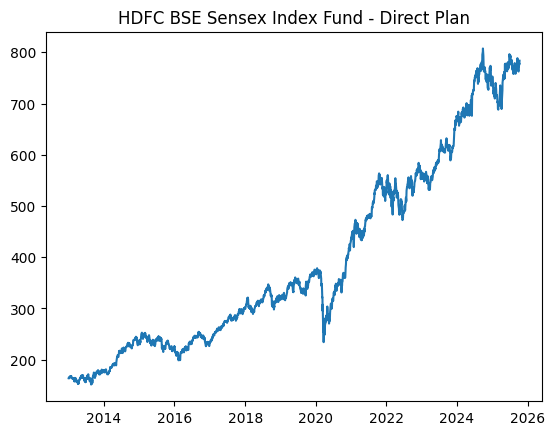

In [123]:
import matplotlib.pyplot as plt

plt.plot(fund_df)
plt.title(fund_name)
plt.show()